In [1]:
import pandas as pd
import seaborn as sns
import sklearn.metrics 
import matplotlib.pyplot as plt
import pygeohash as gh
from sklearn.metrics import accuracy_score 
from sklearn import metrics

### Prediccion

Predecir:

 - Modalidad: vendría a ser categoria

En base a:
 - X: latitud 
 - Y: longitud

In [2]:
df = pd.read_excel('./../Dataset/DATASET.xlsx')

df.iloc[0:2, :]

,layerLALAId,layerName,displayFieldName,value,OBJECTID,GENERICO,ESPECIFICO,MODALIDAD,X,Y,...,ID_ESPECIFICO,CAPITAL,CCDD,CCPP,CCDI,NOMBDEP,NOMBPROV,NOMBDIST,UBIGEO,OBJECTID_1
0,110,Hurto,UBIGEO_HECHO,150117,284505,DELITOS CONTRA EL PATRIMONIO,HURTO,HURTO,-77.077480,-11.934415,...,1049,LOS OLIVOS,15,1,17,LIMA METROPOLITANA 1/,LIMA,LOS OLIVOS,150117.0,543701.0
1,110,Hurto,UBIGEO_HECHO,150117,112844,DELITOS CONTRA EL PATRIMONIO,HURTO,HURTO,-77.073126,-11.934646,...,1049,LOS OLIVOS,15,1,17,LIMA METROPOLITANA 1/,LIMA,LOS OLIVOS,150117.0,225077.0


In [4]:
#Conversion de GEOHASH

df['GEOHASH']=df.apply(lambda x: gh.encode(x.X, x.Y, precision=7), axis=1)

df.iloc[0:2, :]

,layerLALAId,layerName,displayFieldName,value,OBJECTID,GENERICO,ESPECIFICO,MODALIDAD,X,Y,...,CAPITAL,CCDD,CCPP,CCDI,NOMBDEP,NOMBPROV,NOMBDIST,UBIGEO,OBJECTID_1,GEOHASH
0,110,Hurto,UBIGEO_HECHO,150117,284505,DELITOS CONTRA EL PATRIMONIO,HURTO,HURTO,-77.077480,-11.934415,...,LOS OLIVOS,15,1,17,LIMA METROPOLITANA 1/,LIMA,LOS OLIVOS,150117.0,543701.0,5dr982m
1,110,Hurto,UBIGEO_HECHO,150117,112844,DELITOS CONTRA EL PATRIMONIO,HURTO,HURTO,-77.073126,-11.934646,...,LOS OLIVOS,15,1,17,LIMA METROPOLITANA 1/,LIMA,LOS OLIVOS,150117.0,225077.0,5dr983m


In [5]:
pd.DataFrame(df['MODALIDAD'].unique()).rename(columns={0:'Modalidades'})

,Modalidades
0,HURTO
1,HURTO AGRAVADO
2,ROBO
3,ROBO AGRAVADO
4,HOMICIDIO CALIFICADO - ASESINATO
5,MICROCOMERCIALIZACION DE DROGAS


AxesSubplot(0.125,0.11;0.62x0.77)


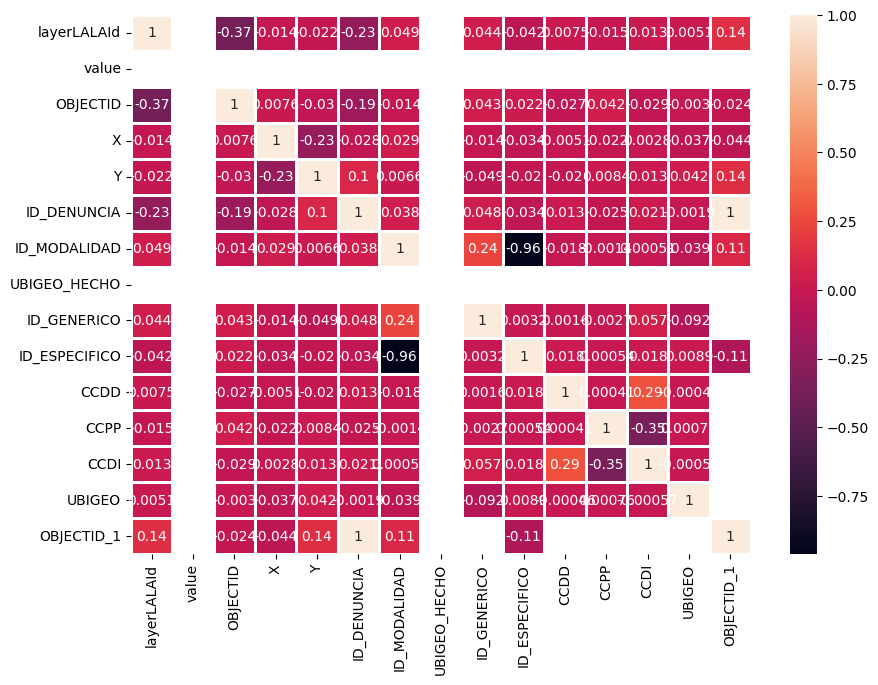

In [6]:
# ver correlacion
plt.figure(figsize=(10,7))
print(sns.heatmap(df.corr(), annot=True, linewidths=2))

## Modelo predictivo de Naive Bayes Classifier

In [7]:
x = df.iloc[:, 8:10].values
y = df.iloc[:, 7].values

In [9]:
#particion de la data test y train

from sklearn.model_selection import train_test_split

#particion -> 796 para el test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=100)

#creacion de modelo
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()

#entrenamiento de modelo
naive_bayes.fit(x_train,y_train)

#prediccion de modelo
y_pred = naive_bayes.predict(x_test)

In [10]:
#modelo predictivo
y_pred = naive_bayes.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test,y_pred))
#ver metrica
#print("R2 es ",round(metrics.r2_score(y_test, y_pred),2))

                                  precision    recall  f1-score   support

HOMICIDIO CALIFICADO - ASESINATO       0.00      0.00      0.00         3
                           HURTO       0.28      0.12      0.17       180
                  HURTO AGRAVADO       0.00      0.00      0.00       166
 MICROCOMERCIALIZACION DE DROGAS       0.00      0.00      0.00         4
                            ROBO       0.37      0.10      0.16       145
                   ROBO AGRAVADO       0.39      0.88      0.54       299

                        accuracy                           0.38       797
                       macro avg       0.17      0.18      0.15       797
                    weighted avg       0.28      0.38      0.27       797



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Modelo predictivo de clasificacion logistica

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

#particion
x_train,x_test,y_train,y_test=train_test_split(x,y,
                            test_size=0.2,random_state=100)

#crea modelo
modeloLogistico=LogisticRegression ()

#entrena modelo
modeloLogistico.fit(x_train,y_train)

#predecir modelo
y_pred=modeloLogistico.predict(x_test)

In [12]:
#confusion de matriz

cm=metrics.confusion_matrix(y_test,y_pred)
#print(cm)
#print("\nReporte de metrica\n")

print(metrics.classification_report(y_test,y_pred) )

                                  precision    recall  f1-score   support

HOMICIDIO CALIFICADO - ASESINATO       0.00      0.00      0.00         3
                           HURTO       0.00      0.00      0.00       180
                  HURTO AGRAVADO       0.00      0.00      0.00       166
 MICROCOMERCIALIZACION DE DROGAS       0.00      0.00      0.00         4
                            ROBO       0.00      0.00      0.00       145
                   ROBO AGRAVADO       0.38      1.00      0.55       299

                        accuracy                           0.38       797
                       macro avg       0.06      0.17      0.09       797
                    weighted avg       0.14      0.38      0.20       797



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av